# Generate all figures

All generated figures are saved to `figures`.

## To do
- Clean up plotting object
- Add remaining docstrings and comments
- Add figure references (will wait until paper is published)

## Import all requirements

In [22]:
%%capture
%load_ext autoreload
%autoreload 2

from src import classify_edges
from src.data import dataset_info
from src.export import export_graphs, export_matrices, export_json
from src.figures import (
    uniform_growth, nonuniform_synapse_addition, connection_classification_counts,
    variable_connections, changing_connections_prevalence, feedforward, modules,
    matrices, spine_like_protrusions, tables
)

# Classify connections as 'stable', 'developmentally dynamic', or 'variable'.
edge_classifications, edge_pair_classifications = classify_edges.classify_edges()

## Volumetric models

1. Export models from [VAST](https://doi.org/10.3389/fncir.2018.00088) to .obj files.
2. Run `src/volumetric_models/zbrush_smooth.py` to create a script for ZBrush.
3. In Zbrush, under Zscript/Load, open the script generate above named "zbrush_script.txt".
4. Press "H" to show loaded scripts, then click the button "SmoothObjects" to run the smoothing.
5. In [Blender ](https://www.blender.org/), import the smoothed models using `src/volumetric_models/blender_import.py`

![volumetric model](figures/volumetric_models/3D_model_Dataset8.png)

## Connectome networks

1. Export graphs into a graphml format using `export.export_graphs_for_cytoscape`.
2. Import the graphs into cytoscape. 
3. Set the node and edge parameters as you see fit.

In [19]:
save_to = 'figures/graphs'
export_graphs.export_graphs_for_cytoscape(save_to, edge_classifications)

x range: -0.02023019527209274 0.03457753594939801
y range: -1.7253534211408061 2.1517340229500017
Saved to `figures/graphs/graphs_for_cytoscape.graphml`


![volumetric model](figures/graphs/stable.png)

## Uniform neurite growth maintains brain geometry

Saved to `figures/uniform_growth/_cable_length`:


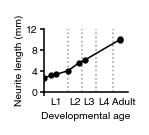

2.54 -> 9.99
Mean increase: 4.79 +- 3.88
Saved to `figures/uniform_growth/_stable_contacts`:


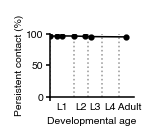

Saved to `figures/uniform_growth/_number_of_synapses`:


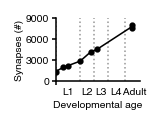

1296.00 -> 7970.00
Mean factor: 3.33 +- 3.35
Saved to `figures/uniform_growth/_synapse_density`:


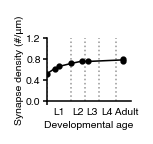

In [35]:
fig = uniform_growth.Figure('figures/uniform_growth')

fig.cable_length('')
fig.proportion_of_stable_contacts('')
fig.number_of_synapses('')
fig.synapse_density('')

# fig.branches_correlation('')
# fig.proportion_of_contacts_with_synapses('')

## Non-uniform synapse addition reshapes the connectome

Corrected p-value: -1.0
Saved to `figures/non-uniform_synapse_addition/_number_of_connections`:


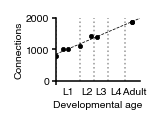

Synapses enforcing existing connections: 4499.0 0.7920077457970249
Synapses making new connections: 1181.5 0.2079922542029751
775.00 -> 1867.00
Factor: 2.41
Corrected p-value: -1.0
Saved to `figures/non-uniform_synapse_addition/_synapses_per_connection`:


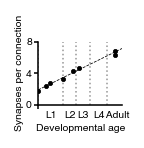

p: 0.00045461505140964044 , r: 0.8727272727272729 , n: 11
Saved to `figures/non-uniform_synapse_addition/_connection_probability`:


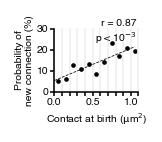

In [50]:
fig = nonuniform_synapse_addition.Figure('figures/non-uniform_synapse_addition')

fig.number_of_connections('')
fig.edge_changes('')
fig.new_edge_contacts('')
# fig.correlate_centrality_with_growth('', increase='synapse', input_output='output')
# fig.correlate_centrality_with_growth('', increase='synapse', input_output='input')
# fig.correlate_centrality_with_growth('', increase='degree', input_output='output')
# fig.correlate_centrality_with_growth('', increase='degree', input_output='input')
# fig.hebbian_plasticity('', quantify_slope=False)

Saved to `figures/non-uniform_synapse_addition/_asymmetry`:


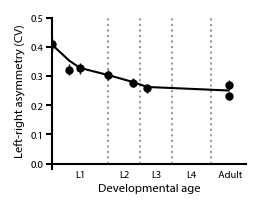

Saved to `figures/non-uniform_synapse_addition/_connectivity_gaps`:


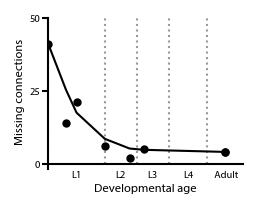

Saved to `figures/non-uniform_synapse_addition/_degree_distribution`:


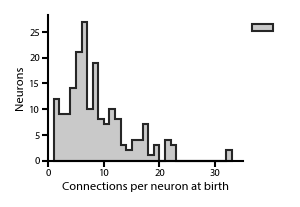

p: 1.5527110046643536e-17 , r: 0.5989136368283345 , n: 166
Saved to `figures/non-uniform_synapse_addition/sup1_correlate_centrality_input_synapse`:


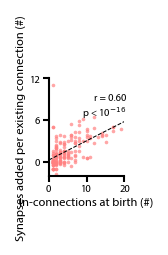

p: 0.32378950178334986 , r: 0.09083742443558439 , n: 120
Saved to `figures/non-uniform_synapse_addition/sup2_correlate_centrality_input_synapse`:


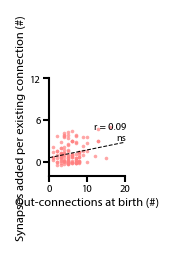

p: 0.157674939019303 , r: -0.12979494776584646 , n: 120
Saved to `figures/non-uniform_synapse_addition/sup3_correlate_centrality_output_synapse`:


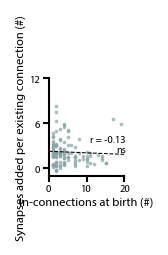

p: 0.12127554336479619 , r: -0.1310896973758629 , n: 141
Saved to `figures/non-uniform_synapse_addition/sup4_correlate_centrality_output_synapse`:


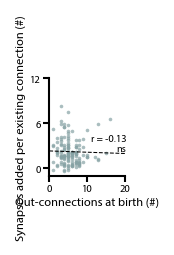

p: 0.0005405517600361824 , r: 0.265698011822785 , n: 166
Saved to `figures/non-uniform_synapse_addition/sup5_correlate_centrality_input_degree`:


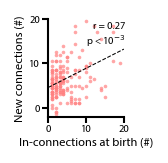

p: 0.00017404514110849325 , r: 0.3361796331583449 , n: 120
Saved to `figures/non-uniform_synapse_addition/sup6_correlate_centrality_input_degree`:


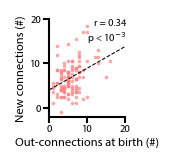

p: 0.9999544524363954 , r: -5.266282962878956e-06 , n: 120
Saved to `figures/non-uniform_synapse_addition/sup7_correlate_centrality_output_degree`:


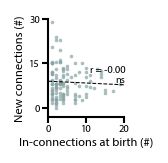

p: 0.08244299981120205 , r: 0.14676854052395263 , n: 141
Saved to `figures/non-uniform_synapse_addition/sup8_correlate_centrality_output_degree`:


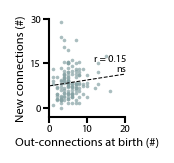

Corrected p-values: [2.37834758e-01 2.26446341e-03 2.46149464e-05]
n: [777, 1249, 95435]
Saved to `figures/non-uniform_synapse_addition/_hebbian_plasticity_slope`:


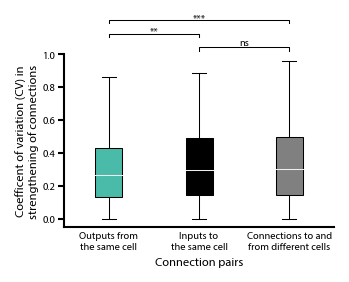

In [45]:
fig.asymmetry('')
fig.connectivity_gaps('')
fig.degree_distribution('')

sup_count = 0
for increase in ('synapse', 'degree'):
    for input_output in ('input', 'output'):
        for x_axis in ('degree_in', 'degree_out'):
            sup_count += 1
            fig.correlate_centrality_with_growth(
                f'sup{sup_count}', increase=increase, input_output=input_output, 
                x_axis=x_axis
            )

fig.hebbian_plasticity('', quantify_slope=True)

## Isogenic individuals have both stereotyped and variable connections

Saved to `figures/connection_classification_counts/_edge_classification_counts_synapses`:


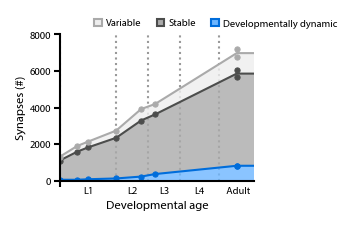

Saved to `figures/connection_classification_counts/_edge_classification_counts_connections`:


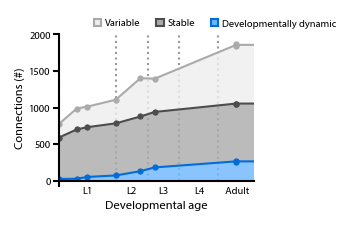

In [18]:
fig = connection_classification_counts.Figure(
    'figures/connection_classification_counts', page_size=4.72441
)

for dataset in ('Dataset2', 'Dataset5' ,'Dataset8'):
    fig.list_connections_between_neurons('', edge_classifications, dataset)
    
fig.edge_classification_count('', edge_classifications, edge_pair_classifications, 'synapses')
fig.edge_classification_count('', edge_classifications, edge_pair_classifications, 'connections')

Saved to `figures/connection_classification_counts/size_edge_classification_counts_connections`:


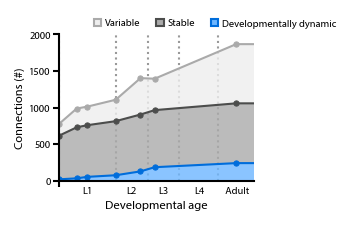

Saved to `figures/connection_classification_counts/density_edge_classification_counts_connections`:


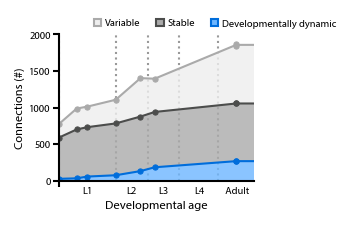

In [81]:
size_classifications, size_pair_classifications = classify_edges.classify_edges(
    edge_type='size', datasets=dataset_info.datasets_with_adj
)
fig.edge_classification_count(
    'size', size_classifications, size_pair_classifications,
    datasets=dataset_info.datasets_with_adj, small=True,
)

density_classifications, density_pair_classifications = classify_edges.classify_edges(
    edge_type='density'
)
fig.edge_classification_count(
    'density', density_classifications, density_pair_classifications, small=True,
)

## Variable connections are not uniformly distributed among cell types

Corrected p-values: [1.09959834e-02 3.27082443e-03 8.55854849e-08 2.60208827e-08
 2.36664079e-07]
n: [57, 22, 34, 30]
Saved to `figures/variable_connections/_variable_edge_prevalence_quantified`:


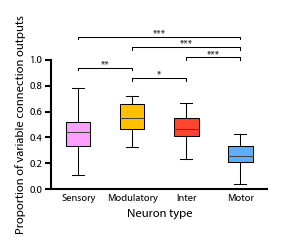

Corrected p-values: [1.07059836e-01 7.70514739e-03 2.02532752e-01 4.03487384e-07
 1.81043248e-05 6.40482774e-08 3.43647569e-09]
n: [57, 23, 44, 38, 32]
Saved to `figures/variable_connections/_variable_edge_prevalence_quantified_in`:


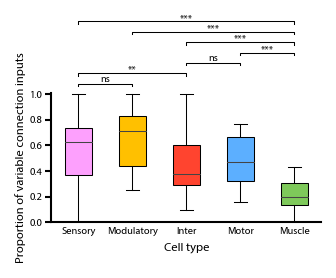

In [24]:
fig = variable_connections.Figure('figures/variable_connections')

fig.variable_edge_prevalence_quantified('', edge_classifications, inputs=False)
fig.variable_edge_prevalence_quantified('', edge_classifications, inputs=True)

Saved to `figures/variable_connections/_at_variable_contacts`:


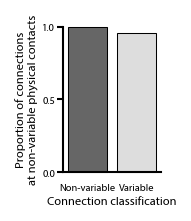

Saved to `figures/variable_connections/_number_of_sections`:


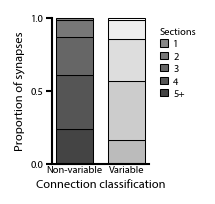

Non-variable one-section synapses: 0.018940350522753675
Variable one-section synapses: 0.025280898876404494
Saved to `figures/variable_connections/_polyadic_partners`:


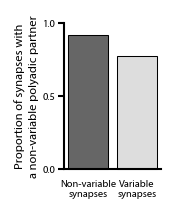

Saved to `figures/variable_connections/_number_of_postsynaptic_cells`:


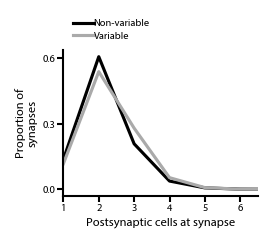

Saved to `figures/variable_connections/_variable_post_synaptic_size`:


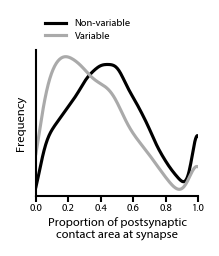

Saved to `figures/variable_connections/_variable_proportion_0`:


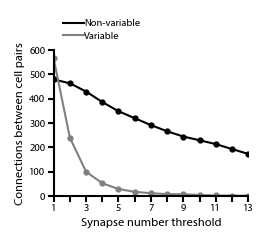

Saved to `figures/variable_connections/_variable_proportion_1`:


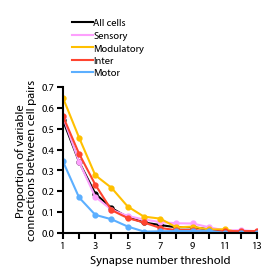

In [153]:
fig = variable_connections.Figure('figures/variable_connections')

_, adj_pair_classifications = classify_edges.classify_edges(
    edge_type='contact', datasets=dataset_info.datasets_with_adj
)

fig.variable_contacts('', adj_pair_classifications, edge_pair_classifications)
fig.sections_per_synapse('', edge_classifications)
fig.polyadic_partners('', edge_classifications)
fig.number_of_postsynaptic_cells('', edge_classifications)
fig.synapse_post_size('', edge_classifications)
fig.variable_proportion('', edge_pair_classifications, ratio=False)
fig.variable_proportion('', edge_pair_classifications)

Saved to `figures/variable_connections/_venn_n2u`:


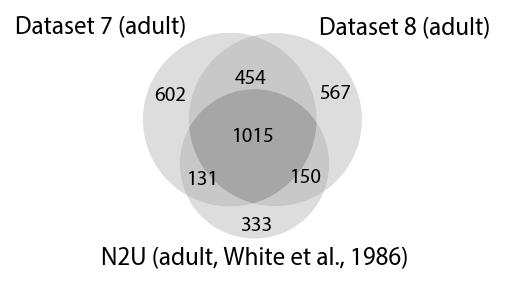

Saved to `figures/variable_connections/_venn_n2u_cook`:


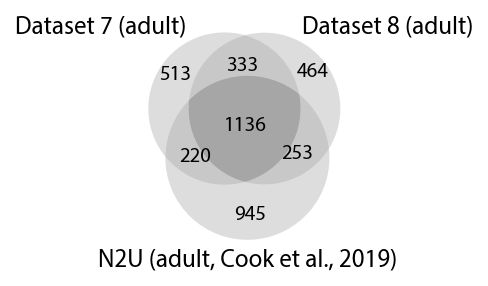

New connections added by Cook et al. to N2U: 1109
Proportion of new connections in Dataset 7 and 8: 0.38
Corrected p-values: [6.88942285e-02 2.37319153e-03 3.73202655e-05 8.49285153e-07
 2.54435350e-05]
n: [65, 28, 37, 34]
Saved to `figures/variable_connections/by_adult_variable_edge_prevalence_quantified`:


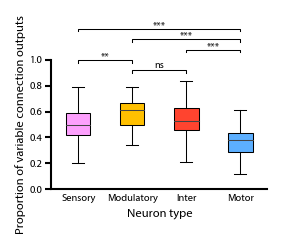

Corrected p-values: [3.40487278e-01 2.19793756e-06 1.50240131e-01 1.30667551e-06
 2.36453161e-04 4.96963239e-09 1.59996510e-11]
n: [65, 29, 44, 42, 32]
Saved to `figures/variable_connections/by_adult_variable_edge_prevalence_quantified_in`:


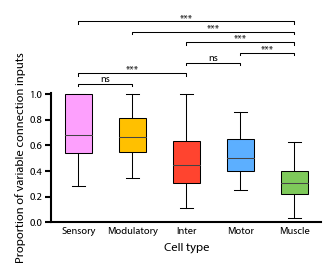

Saved to `figures/variable_connections/_filling_fraction_outputs`:


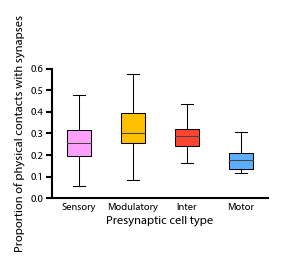

Saved to `figures/variable_connections/_filling_fraction_inputs`:


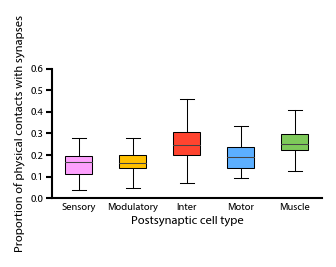

p: 0.07930061898227768 , r: 0.14934940988854006 , n: 139
Saved to `figures/variable_connections/_variable_edge_prevalence_vs_synapse_number`:


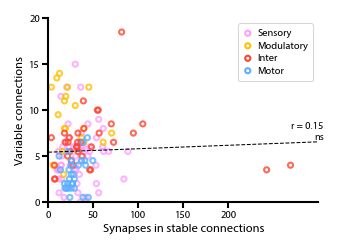

Saved to `figures/variable_connections/_variable_edge_prevalence_vs_synapse_number_box`:


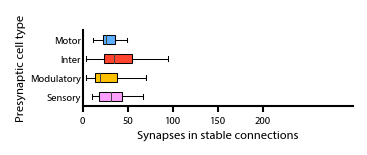

p: 0.5646205047401607 , r: 0.049270250037268835 , n: 139
Saved to `figures/variable_connections/_variable_edge_prevalence_vs_stable_growth`:


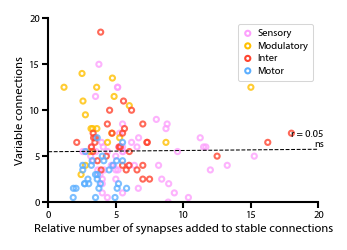

Saved to `figures/variable_connections/_variable_edge_prevalence_vs_stable_growth_box`:


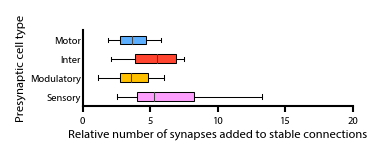

In [98]:
nonvar_out, var_out, nonvar_in, var_in = fig.variability_between_adults('')

fig.variable_edge_prevalence_quantified(
    'by_adult', edge_classifications, inputs=False, 
    nonvariable=nonvar_out, variable=var_out
)
fig.variable_edge_prevalence_quantified(
    'by_adult', edge_classifications, inputs=True, 
    nonvariable=nonvar_in, variable=var_in
)

fig.filling_fraction_per_type('', inputs=False)
fig.filling_fraction_per_type('', inputs=True)
fig.variable_correlation('', edge_classifications, versus='synapse_number')
fig.variable_correlation('', edge_classifications, versus='synapse_number', box=True) 
fig.variable_correlation('', edge_classifications, versus='stable_growth')
fig.variable_correlation('', edge_classifications, versus='stable_growth', box=True)

## Interneuron connections are stable during maturation

In [110]:
fig = changing_connections_prevalence.Figure('figures/changing_connections_prevalence')

fig.changes_type_overrepresentation('by_synapse_count', edge_classifications)

Statistically significant over- or underrepresentation:
inter_inter under p = 1.9754112353343393e-05 n = 160
inter_motor under p = 0.04198245113890283 n = 52
motor_muscle over p = 0.03198261740089399 n = 145
modulatory_muscle over p = 0.0061483325971010945 n = 10
sensory_muscle over p = 0.03912914268373881 n = 6
Saved to `figures/changing_connections_prevalence/by_synapse_count_changes_type_overrepresentation.txt`


In [115]:
size_classifications, size_pair_classifications = classify_edges.classify_edges(
    edge_type='size', datasets=dataset_info.datasets_with_adj
)
fig.changes_type_overrepresentation('by_synapse_size', size_classifications)

fig.relative_synapse_increase_by_type('', edge_classifications)

Statistically significant over- or underrepresentation:
inter_inter under p = 0.025706475812286043 n = 172
modulatory_motor over p = 0.025706475812286043 n = 46
modulatory_muscle over p = 0.025068596206316844 n = 8
sensory_muscle over p = 0.025706475812286043 n = 6
Saved to `figures/changing_connections_prevalence/by_synapse_size_changes_type_overrepresentation.txt`
Saved to `figures/changing_connections_prevalence/_synapse_increase_by_type.txt`


## Increase in both feedforward signal flow across maturation

Corrected p-values: [0.13580618 0.00075006 0.00059904]
n: [301, 229, 107]
Saved to `figures/feedforward/_feedforward_stable_increase`:


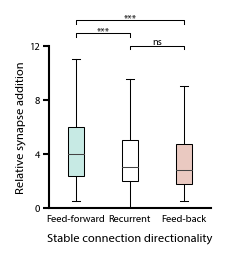

(('Feed-back', [128, 27, 6]), ('Recurrent', [269, 53, 10]), ('Feed-forward', [340, 118, 2]))
[0.0015336  0.00318665]
Saved to `figures/feedforward/_feedforward_edge_proportion`:


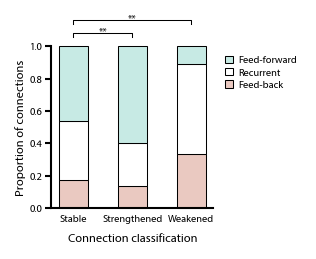

Corrected p-value: 0.017164147499911832
Corrected p-value: 0.00019645676493361796
Corrected p-value: 0.10772123669287088
Saved to `figures/feedforward/_feedforward_global_shift`:


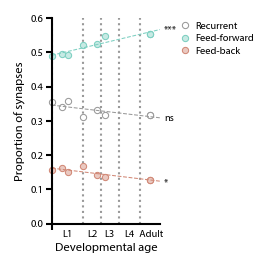

In [116]:
fig = feedforward.Figure('figures/feedforward')

fig.feedforward_stable_increase('', edge_classifications)
fig.feedforward_edge_proportion('', edge_classifications)
fig.feedforward_global_shift('')

Corrected p-values: [0.38985757 0.04138105 0.04138105]
n: [301, 229, 107]
Saved to `figures/feedforward/_feedforward_stable_increase_size`:


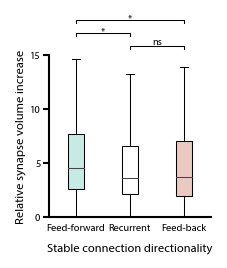

In [120]:
fig.feedforward_stable_increase('', edge_classifications, use_size=True)

## Increase in modularity across maturation

To determine modules by weighted stochastic blockmodeling:

1. Export matrices to mat files using `export_matrices.export_to_matlab('data/WSBM', edge_classifications)`.
2. Edit the files in `src/WSBM/scripts/compute_clusters/multiple_model_fit/B-all` to set the number of modules you want to calculate for each dataset.
3. On a cluster with Slurm, fit all models by changing to directory `src/WSBM/scripts/compute_clusters/multiple_model_fit` and running `./submit_B-all.sh`.
4. Compute network statistics on the final models using `extract_stats('./results/B-all/')`.
5. Fit the consensus model for each model, similar to steps 2-3 but under `src/WSBM/scripts/compute_clusters/fitConsensus`.
6. Plot the log evidence for each model using `src/WSBM/scripts/analysis/plot_all_analysis.m`.
7. Copy the final optimal modules to `src/data/data_manager.py` for further analysis.

Saved to `figures/modules/_modules_across_development`:


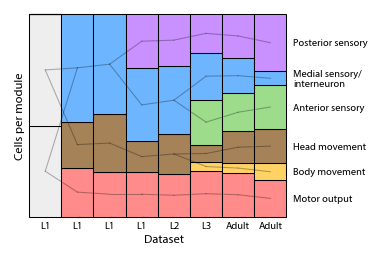

In [25]:
fig = modules.Figure('figures/modules')

fig.modules_across_development('')

## Adjacency matrices


Saved to `figures/matrices/connectivity_adjacency_matrix`:


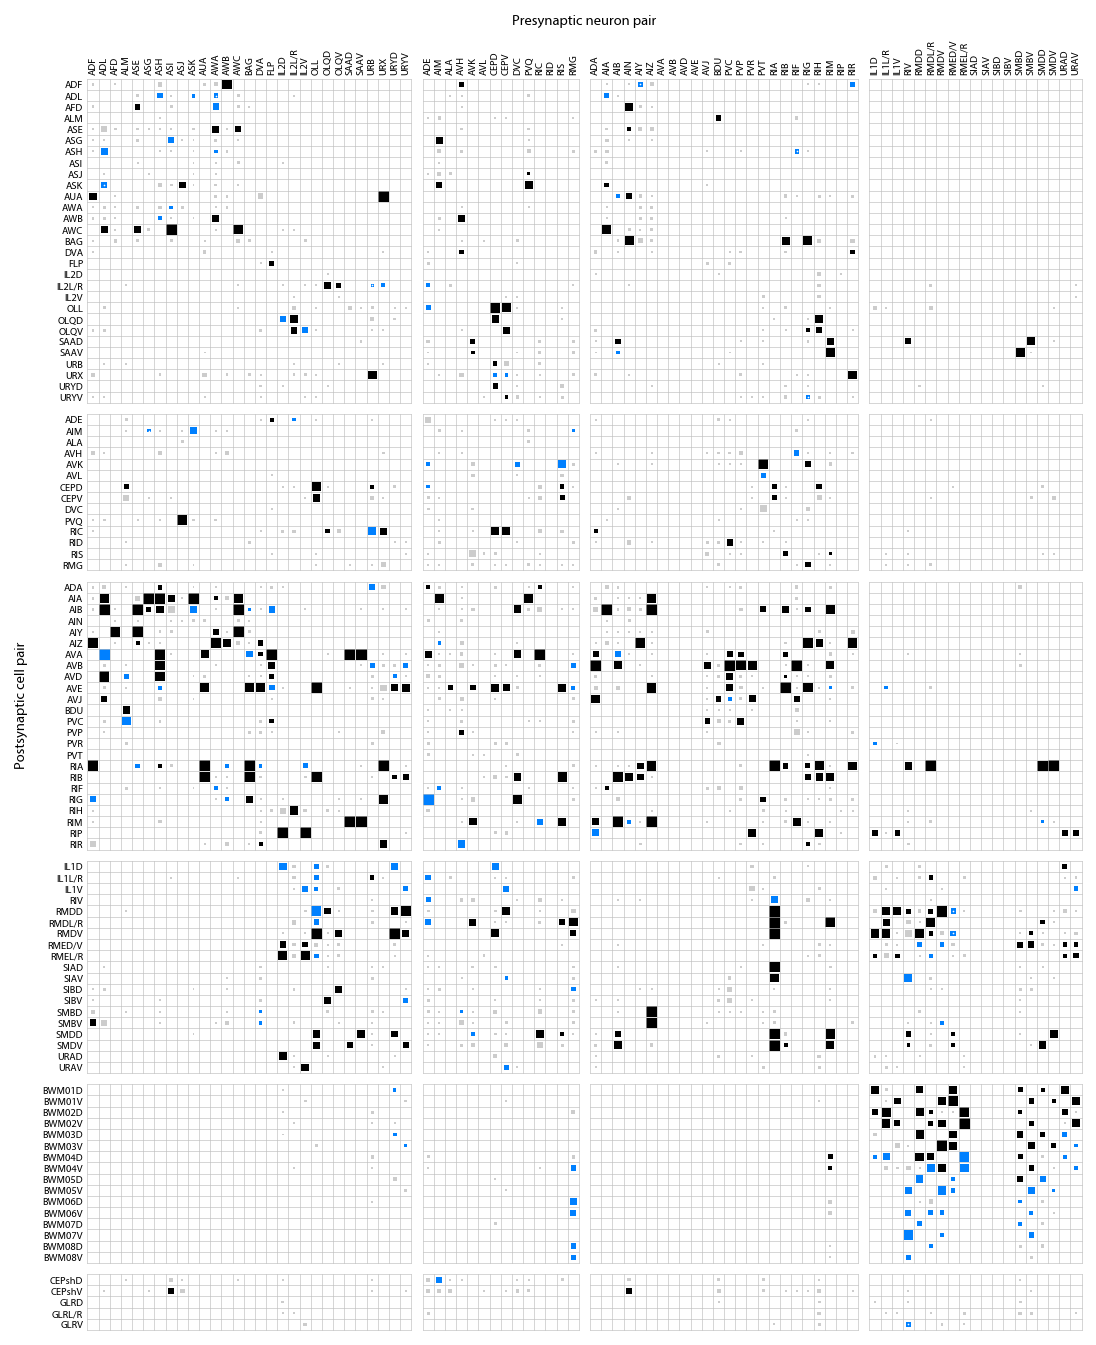

Saved to `figures/matrices/contact_adjacency_matrix`:


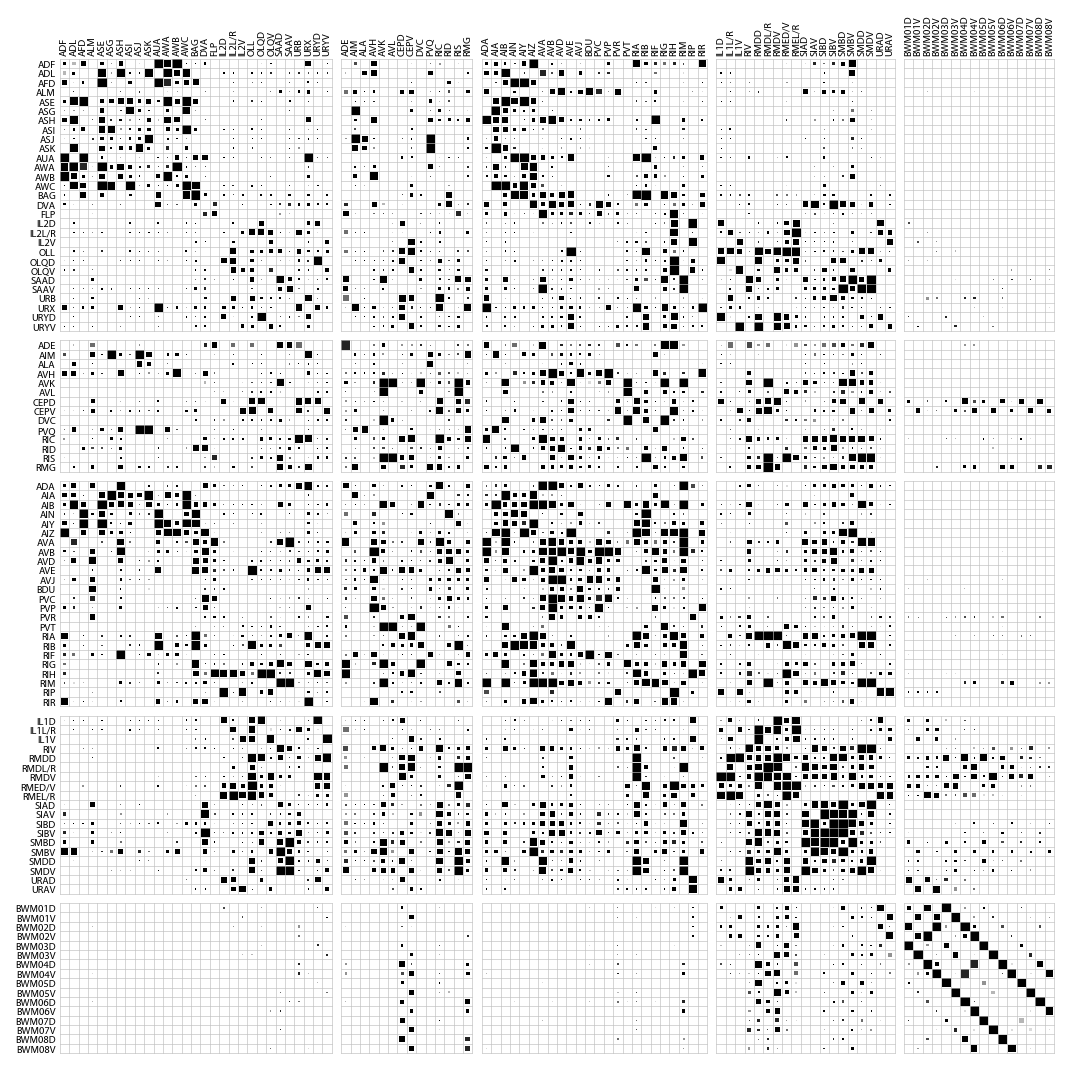

In [10]:
fig = matrices.Figure('figures/matrices')

fig.adjacency_matrix('connectivity', edge_pair_classifications, contact=False)
fig.adjacency_matrix('contact', edge_pair_classifications, contact=True)

## Spine-like protrusions

Corrected p-value: 6.548558831120599e-05
Saved to `figures/spine-like_protrusions/_proportion_of_synapses_on_branches`:


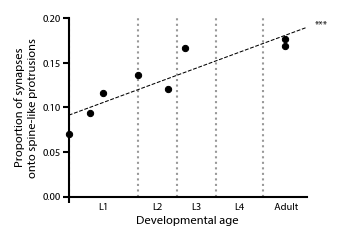

Corrected p-value: 5.296153515644831e-07
Saved to `figures/spine-like_protrusions/_number_of_branches`:


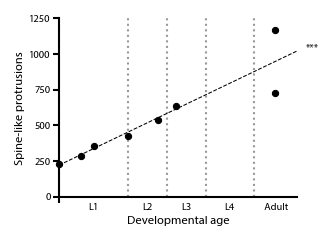

Corrected p-value: 0.00017815677276504857
Saved to `figures/spine-like_protrusions/_proportion_of_branches_with_input`:


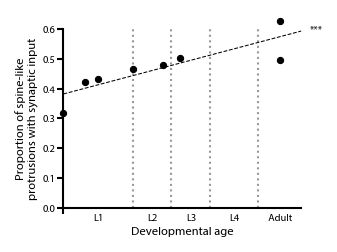

Saved to `figures/spine-like_protrusions/_branch_locations`:


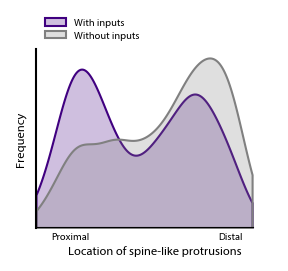

MannwhitneyuResult(statistic=107740.5, pvalue=1.0652619160779038e-12)
Saved to `figures/spine-like_protrusions/_branches_per_neuron`:


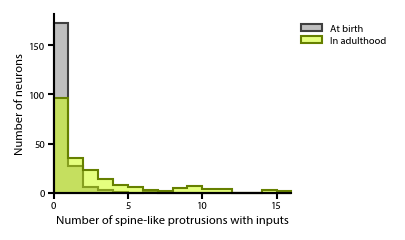

Saved to `figures/spine-like_protrusions/_branches_by_type`:


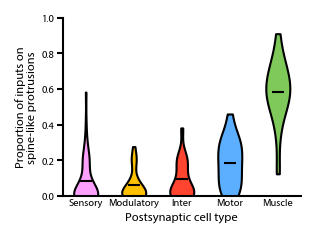

Significant pairs:
Stable - Dev. dynamic 3.6909631057834616e-34
Variable - Dev. dynamic 5.070170352974808e-25
Saved to `figures/spine-like_protrusions/_branch_synapses_by_edge_classification`:


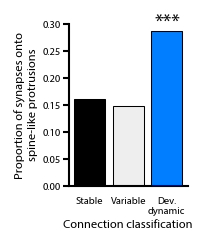

In [41]:
fig = spine_like_protrusions.Figure('figures/spine-like_protrusions')

fig.proportion_of_synapses_on_branches('')
fig.number_of_branches('')
fig.proportion_of_branches_with_synapses('')
fig.branch_locations('')
fig.branches_per_neuron('')
fig.branches_by_type('')
fig.branch_synapses_by_edge_classification('', edge_classifications)

## Export tables and matrices

Saved to `tables/_cells_in_modules`:


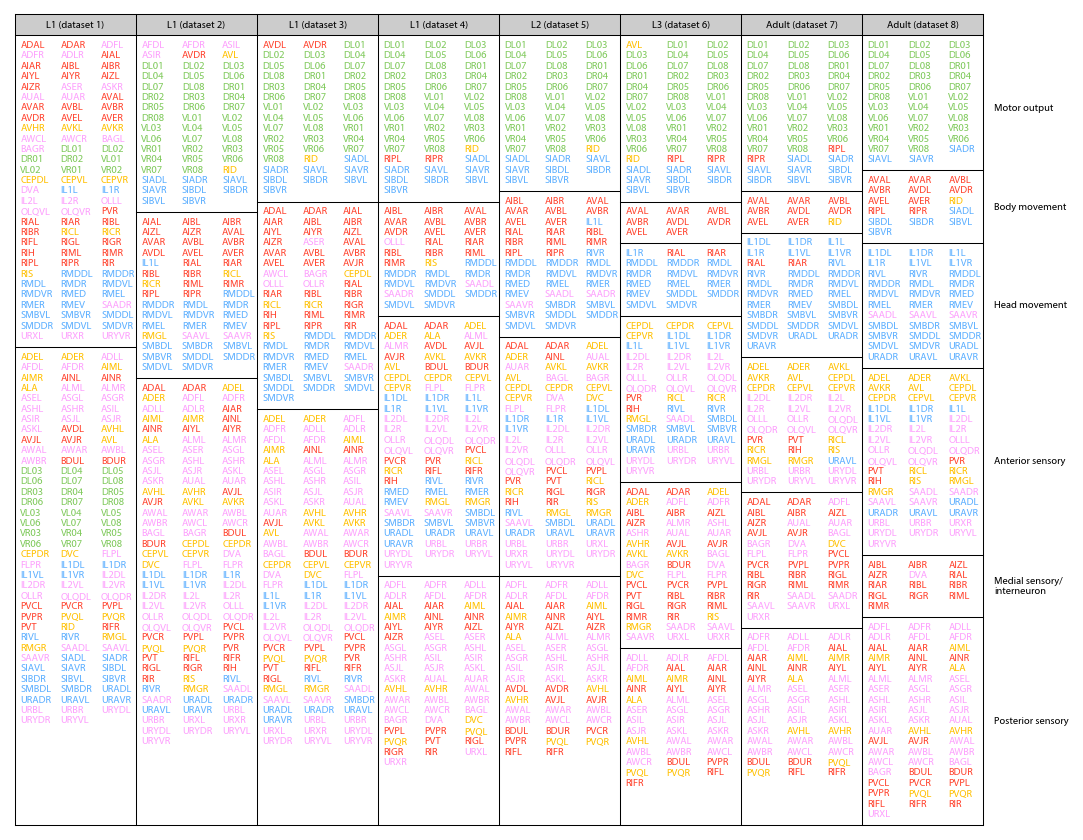

In [18]:
fig = tables.Figure('tables')

#fig.neuron_table('')
fig.cells_in_modules_table('')

In [149]:
export_matrices.export_classifications('tables', edge_classifications)

export_matrices.export_to_excel('tables')

synapses_and_branches = spine_like_protrusions.Figure.synapses_on_branches(exclude_postemb=False, remove_unknown=False)
export_matrices.export_synapses('tables', synapses_and_branches)

Saved to `tables/connection_classifications.csv`
Saved to `tables/synapse_count_matrices.xlsx`
Saved to `tables/synapse_size_matrices.xlsx`
Saved to `tables/contact_matrices.xlsx`
Saved to `tables/synapse_list.csv`


**Export for NemaNode.org**

In [51]:
export_json.export_nemanode_connections('data/nemanode')

Exported data/nemanode/witvliet_2020_1.json
Exported data/nemanode/witvliet_2020_2.json
Exported data/nemanode/witvliet_2020_3.json
Exported data/nemanode/witvliet_2020_4.json
Exported data/nemanode/witvliet_2020_5.json
Exported data/nemanode/witvliet_2020_6.json
Exported data/nemanode/witvliet_2020_7.json
Exported data/nemanode/witvliet_2020_8.json
